# Parte A - Regresión Logística Binaria


In [ ]:
#Para Limpiar y reiniciar el entorno
#%reset -f
#activar entorno virtual
#python -m venv .venv
#.venv\Scripts\activate
#pip install --upgrade pip

Importar librerías y verificar entorno

In [1]:
#%pip install ucimlrepo


## A.1. Exploración y preprocesamiento del dataset


In [1]:
# ==============================================================
# PARTE A — REGRESIÓN LOGÍSTICA BINARIA DESDE CERO (UCI id=45)
# ==============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

from utils.preprocessing import load_heart_data
from utils.logistic_core import logistic_regression_train, predict
from utils.metrics import evaluate_classification
from utils.visualization import plot_convergence

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from ucimlrepo import fetch_ucirepo

Entorno de trabajo correctamente configurado.

Versión de Python: 3.10.0
Numpy: 2.2.6
Pandas: 2.3.2
Scikit-learn: 1.7.0
Matplotlib: 3.10.3
Seaborn: 0.13.2
OpenML: 0.15.1
Joblib: 1.5.1


Carga y exploración mínima

In [3]:
# ==============================================================
# 1. CARGA DEL DATASET DESDE UCI (id=45)
# ==============================================================

heart = fetch_ucirepo(id=45)
X_raw = heart.data.features
y_raw = heart.data.targets.iloc[:, 0].apply(lambda v: 0 if v == 0 else 1)

df = pd.concat([X_raw, y_raw.rename("target")], axis=1)
print("Dimensiones originales:", df.shape)
display(df.head())

# ==============================================================


Dimensiones originales: (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


Visualización exploratoria

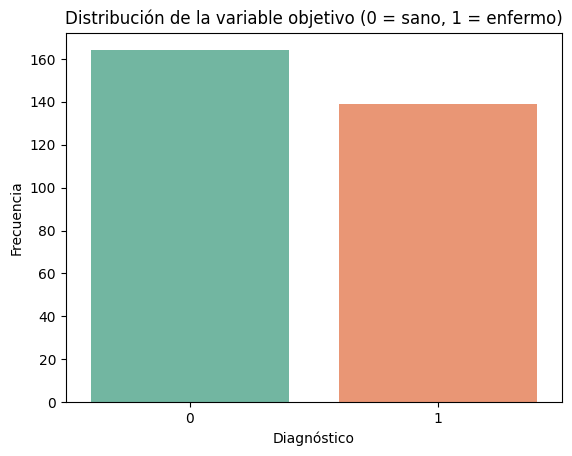

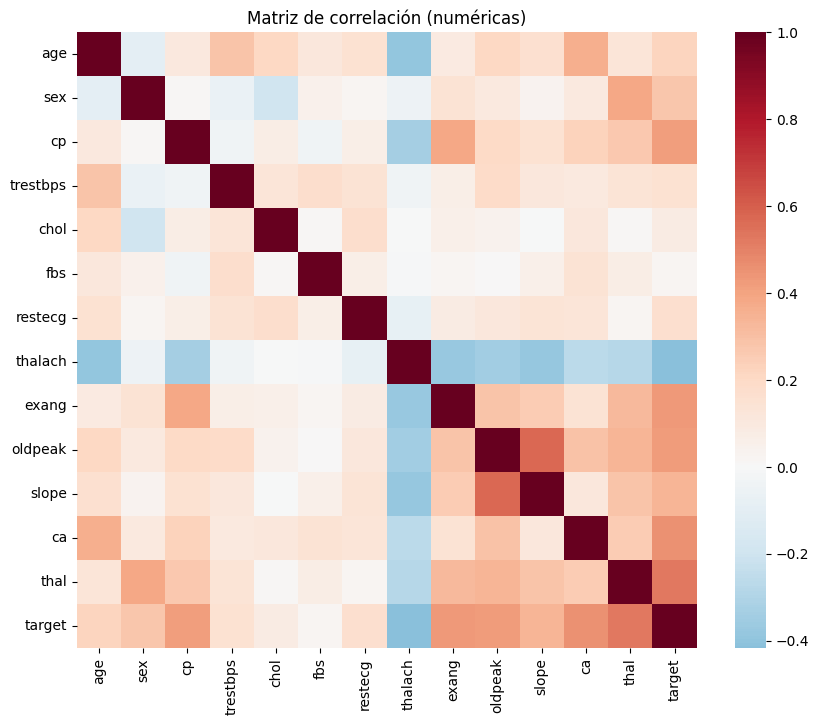

In [4]:
# ==============================================================
# 3. VISUALIZACIÓN DE LA VARIABLE OBJETIVO
# ==============================================================

sns.countplot(x="target", hue="target", data=df, palette="Set2", legend=False)
plt.title("Distribución de la variable objetivo (0 = sano, 1 = enfermo)")
plt.xlabel("Diagnóstico")
plt.ylabel("Frecuencia")
plt.show()

corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap="RdBu_r", center=0)
plt.title("Matriz de correlación (numéricas)")
plt.show()


Preprocesamiento (one-hot, estandarización, split 70/30)

In [5]:
X_train, X_test, y_train, y_test, feature_names = load_heart_data()
print("Sanity NaN (deben ser False False):",
      np.isnan(X_train).any(), np.isnan(X_test).any())

✅ UCI id=45 preprocesado (sin imputar, filas con NaN eliminadas).
Train: (207, 18) | Test: (90, 18)
Sanity NaN (deben ser False False): False False


## A.2. Implementación desde cero


Entrenamiento desde cero con dos learning rates

In [6]:
w1, b1, losses1 = logistic_regression_train(X_train, y_train, lr=0.01, n_iter=1000)
w2, b2, losses2 = logistic_regression_train(X_train, y_train, lr=0.1,  n_iter=1000)


Iteración    0 | Pérdida: 0.6931
Iteración  100 | Pérdida: 0.5727
Iteración  200 | Pérdida: 0.5189
Iteración  300 | Pérdida: 0.4887
Iteración  400 | Pérdida: 0.4689
Iteración  500 | Pérdida: 0.4546
Iteración  600 | Pérdida: 0.4436
Iteración  700 | Pérdida: 0.4349
Iteración  800 | Pérdida: 0.4276
Iteración  900 | Pérdida: 0.4215
Iteración    0 | Pérdida: 0.6931
Iteración  100 | Pérdida: 0.4160
Iteración  200 | Pérdida: 0.3865
Iteración  300 | Pérdida: 0.3733
Iteración  400 | Pérdida: 0.3656
Iteración  500 | Pérdida: 0.3605
Iteración  600 | Pérdida: 0.3569
Iteración  700 | Pérdida: 0.3542
Iteración  800 | Pérdida: 0.3520
Iteración  900 | Pérdida: 0.3503


## A.3. Gráficos de convergencia


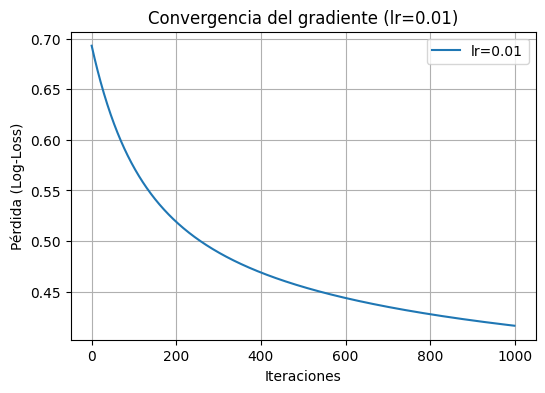

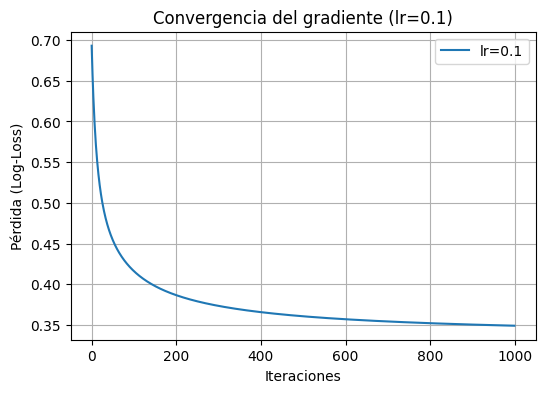

In [7]:
# ==============================================================
# A.3. Gráficos de convergencia
# ==============================================================

plot_convergence(losses1, lr=0.01, save_path="../report/figuras/curva_convergencia_binaria.png")
plot_convergence(losses2, lr=0.1)



## A.4. Evaluación del modelo


Evaluación (accuracy, precision, recall, F1)

In [8]:
y_pred1 = predict(X_test, w1, b1)
y_pred2 = predict(X_test, w2, b2)

print("Desde cero (lr=0.01) ->", evaluate_classification(y_test, y_pred1))
print("Desde cero (lr=0.1 ) ->", evaluate_classification(y_test, y_pred2))
# ==============================================================

Desde cero (lr=0.01) -> {'accuracy': 0.867, 'precision': 0.895, 'recall': 0.81, 'f1': 0.85}
Desde cero (lr=0.1 ) -> {'accuracy': 0.844, 'precision': 0.889, 'recall': 0.762, 'f1': 0.821}


## A.5. Matriz de confusión y curva ROC (modelo desde cero)

Matriz de confusión


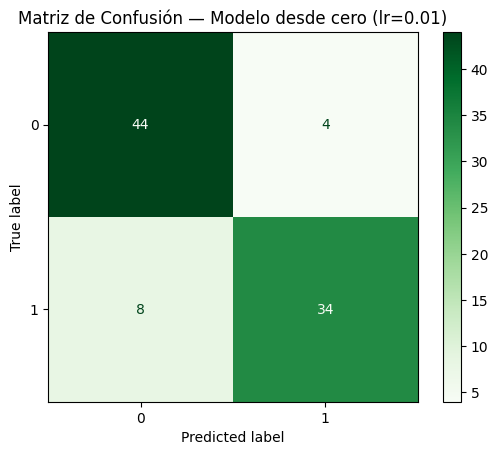

In [9]:
cm = confusion_matrix(y_test, y_pred1)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap="Greens")
plt.title("Matriz de Confusión — Modelo desde cero (lr=0.01)")
plt.savefig("../report/figuras/matriz_confusion_binaria.png", dpi=300)
plt.show()


Curva ROC (probabilidades del modelo desde cero)


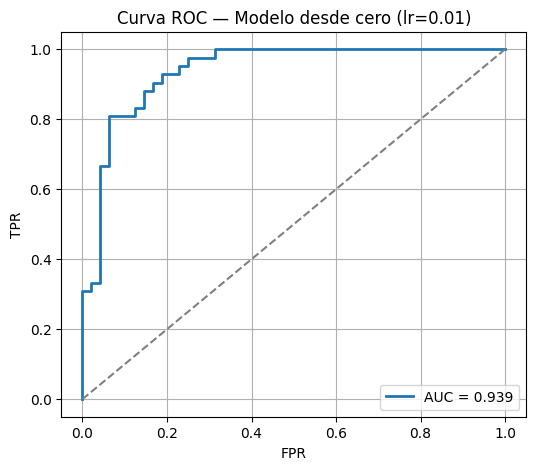

In [11]:
y_scores = 1 / (1 + np.exp(-(X_test @ w1 + b1)))
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}", lw=2)
plt.plot([0,1],[0,1],"--", color="gray")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Curva ROC — Modelo desde cero (lr=0.01)")
plt.legend()
plt.grid(True)
plt.savefig("../report/figuras/roc_binaria.png", dpi=300)
plt.show()


## A.6. Comparación con scikit-learn


Comparación con scikit-learn

In [12]:
sk = LogisticRegression(max_iter=1000)
sk.fit(X_train, y_train)
y_pred_sk = sk.predict(X_test)

res = pd.DataFrame([
    evaluate_classification(y_test, y_pred1),
    evaluate_classification(y_test, y_pred2),
    evaluate_classification(y_test, y_pred_sk),
], index=["Desde cero (lr=0.01)", "Desde cero (lr=0.1)", "Scikit-learn"])

display(res)

,accuracy,precision,recall,f1
Desde cero (lr=0.01),0.867,0.895,0.810,0.850
Desde cero (lr=0.1),0.844,0.889,0.762,0.821
Scikit-learn,0.811,0.857,0.714,0.779
